In [146]:
import pandas as pd
import  numpy as np
import seaborn as sns
import random 
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
warnings.filterwarnings('ignore')

In [103]:
data=pd.read_csv('./data.csv',error_bad_lines=False)

b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878: expected 2 fields, saw 5\nSkipping line 35643: expected 2 fields, saw 5\nSkipping line 36550: expected 2 fields, saw 5\nSkipping line 38732: expected 2 fields, saw 5\nSkipping line 40567: expected 2 fields, saw 5\nSkipping line 40576: expected 2 fields, saw 5\nSkipping line 

b'Skipping line 525174: expected 2 fields, saw 5\nSkipping line 526251: expected 2 fields, saw 5\nSkipping line 529611: expected 2 fields, saw 5\nSkipping line 531398: expected 2 fields, saw 5\nSkipping line 534146: expected 2 fields, saw 5\nSkipping line 544954: expected 2 fields, saw 5\nSkipping line 553002: expected 2 fields, saw 5\nSkipping line 553883: expected 2 fields, saw 5\nSkipping line 553887: expected 2 fields, saw 5\nSkipping line 553915: expected 2 fields, saw 5\nSkipping line 554172: expected 2 fields, saw 5\nSkipping line 563534: expected 2 fields, saw 5\nSkipping line 565191: expected 2 fields, saw 5\nSkipping line 574108: expected 2 fields, saw 5\nSkipping line 574412: expected 2 fields, saw 5\nSkipping line 575985: expected 2 fields, saw 5\nSkipping line 580091: expected 2 fields, saw 5\nSkipping line 582682: expected 2 fields, saw 5\nSkipping line 585885: expected 2 fields, saw 5\nSkipping line 590171: expected 2 fields, saw 5\nSkipping line 591924: expected 2 field

In [104]:
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [105]:
data['strength'].unique()



array([1, 2, 0])

In [106]:
data.isna().sum()


password    1
strength    0
dtype: int64

In [107]:
data[data['strength'].isnull()]

,password,strength


In [108]:
data.dropna(inplace=True)

In [109]:
data.isna().sum()



password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

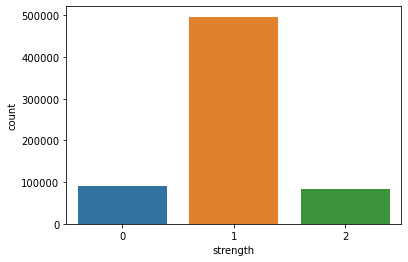

In [110]:
sns.countplot(data['strength'])

In [111]:
password_tuple=np.array(data)

In [112]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [113]:

random.shuffle(password_tuple)

In [114]:
x = [label[0] for label in password_tuple]
y =[label[1] for label in password_tuple]

In [115]:
x

['kzde5577',
 'kino3434',
 'visi7k1yr',
 'megzy123',
 'lamborghin1',
 'kzde5577',
 'kzde5577',
 'kzde5577',
 'kino3434',
 'v1118714',
 'universe2908',
 'as326159',
 'asv5o9yu',
 'jytifok873',
 'universe2908',
 'kzde5577',
 '52558000aaa',
 'g067057895',
 'jytifok873',
 'u6c8vhow',
 'megzy123',
 'sbl571017',
 'WUt9IZzE0OQ7PkNE',
 'as326159',
 'czuodhj972',
 'as326159',
 'g067057895',
 '52558000aaa',
 'kino3434',
 'sbl571017',
 'intel1',
 'universe2908',
 'faranumar91',
 'megzy123',
 'kzde5577',
 '0169395484a',
 'jytifok873',
 '0169395484a',
 'asv5o9yu',
 'yitbos77',
 'asgaliu11',
 'intel1',
 'v1118714',
 'sbl571017',
 'yqugu927',
 'klara-tershina3H',
 'kzde5577',
 'memjan123',
 'lsdlsd1',
 'jerusalem393',
 'lamborghin1',
 'olmaz.',
 'openup12',
 'asv5o9yu',
 'a2531106',
 'fahad123',
 'faranumar91',
 'czuodhj972',
 'hpqkoxsn5',
 'a2531106',
 '52558000aaa',
 'yk530mg8',
 'g067057895',
 'as326159',
 'v1118714',
 'b4NbTxDEyNgG141J',
 '6975038lp',
 'elyass15@ajilent-ci',
 'memjan123',
 'fk9qi

In [116]:
def word_divide_char(input):
    character =[]
    for i in input:
        character.append(i)
    return character
    

In [117]:
word_divide_char("kino3434")

['k', 'i', 'n', 'o', '3', '4', '3', '4']

In [118]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)

In [119]:
X=vectorizer.fit_transform(x)

In [120]:
X.shape



(669639, 130)

In [121]:
first_document_vector=X[0]

In [122]:
first_document_vector

<1x130 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [123]:
first_document_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.5668572 ],
        [0.        ],
        [0.59139772],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [124]:
df=pd.DataFrame(first_document_vector.T.todense(),index = vectorizer.get_feature_names(),columns=['TF-IDF'])

In [125]:
df.sort_values(by=['TF-IDF'],ascending=False)

,TF-IDF
7,0.591398
5,0.566857
z,0.336296
k,0.291685
d,0.285932
...,...
?,0.000000
>,0.000000
=,0.000000
<,0.000000


In [126]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [127]:
x_train.shape

(535711, 130)

In [131]:
clf=LogisticRegression(random_state=0,multi_class='multinomial')

In [132]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [137]:
dt=np.array(["@1234adbv"])
pred=vectorizer.transform(dt)
clf.predict(pred)

array([1])

In [141]:
y_pred=clf.predict(x_test)

In [144]:
accuracy_score(y_test,y_pred)

0.8192760289110567

In [145]:
confusion_matrix(y_test,y_pred)

array([[ 5392, 12651,    15],
       [ 3918, 92984,  2519],
       [   37,  5064, 11348]])

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.30      0.39     18058
           1       0.84      0.94      0.89     99421
           2       0.82      0.69      0.75     16449

    accuracy                           0.82    133928
   macro avg       0.74      0.64      0.68    133928
weighted avg       0.80      0.82      0.80    133928

